![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [57]:
# Start your code here!
import pandas as pd
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

women_df = pd.read_csv("women_results.csv") 
men_df = pd.read_csv("men_results.csv")

print(women_df.info())
print(men_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: i

In [58]:
# Convert the 'date' columns to datetime format
women_df['date'] = pd.to_datetime(women_df['date'])
men_df['date'] = pd.to_datetime(men_df['date'])

# Do we need to filter this data?
print(women_df['date'].agg(['min', 'max']))
print(men_df['date'].agg(['min', 'max']))

print(women_df['tournament'].value_counts())
print(men_df['tournament'].value_counts())

min   1969-11-01
max   2022-07-31
Name: date, dtype: datetime64[ns]
min   1872-11-30
max   2022-12-18
Name: date, dtype: datetime64[ns]
UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF 

In [59]:
# Filter the data for World Cup matches since 2002
women_world_cup = women_df[(women_df['tournament'] == 'FIFA World Cup') & (women_df['date'] >= '2002-01-01')]
men_world_cup = men_df[(men_df['tournament'] == 'FIFA World Cup') & (men_df['date'] >= '2002-01-01')]

print(women_world_cup.head())
print(men_world_cup.head())

      Unnamed: 0       date  ... away_score      tournament
1600        1600 2003-09-20  ...          3  FIFA World Cup
1601        1601 2003-09-20  ...          0  FIFA World Cup
1602        1602 2003-09-20  ...          1  FIFA World Cup
1603        1603 2003-09-20  ...          0  FIFA World Cup
1604        1604 2003-09-21  ...          1  FIFA World Cup

[5 rows x 7 columns]
       Unnamed: 0       date  ... away_score      tournament
25164       25164 2002-05-31  ...          1  FIFA World Cup
25165       25165 2002-06-01  ...          0  FIFA World Cup
25166       25166 2002-06-01  ...          1  FIFA World Cup
25167       25167 2002-06-01  ...          2  FIFA World Cup
25168       25168 2002-06-02  ...          0  FIFA World Cup

[5 rows x 7 columns]


1600    3
1601    2
1602    5
1603    6
1604    4
Name: total_goals, dtype: int64
25164    1
25165    8
25166    2
25167    3
25168    1
Name: total_goals, dtype: int64


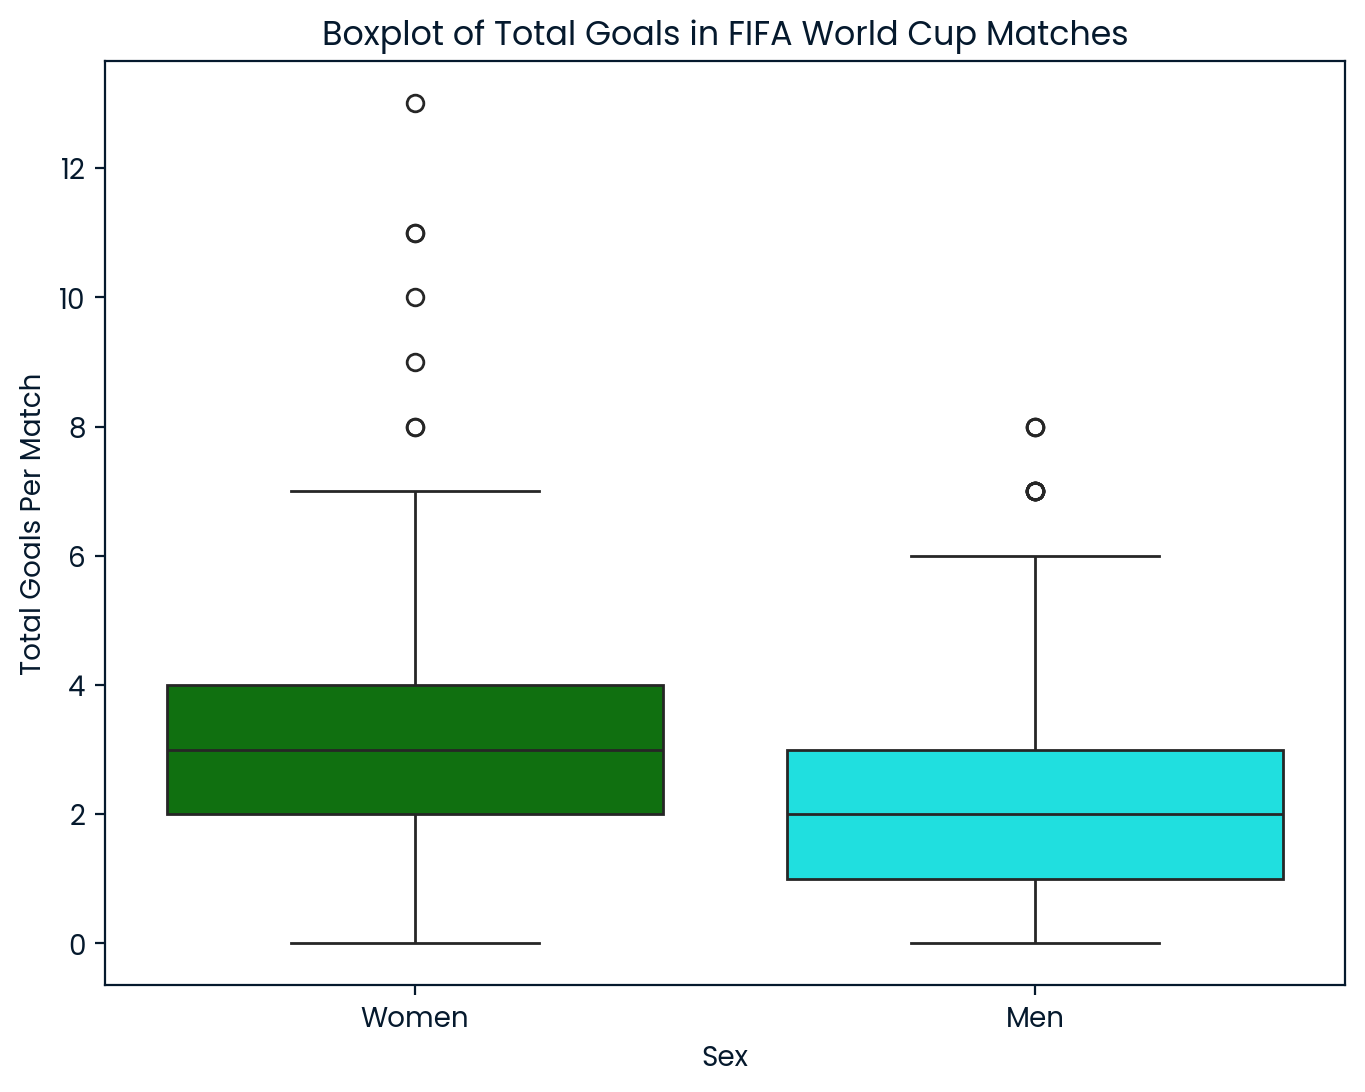

In [60]:
# Now, to calculate total goals in each match...
women_world_cup['total_goals'] = women_world_cup['home_score'] + women_world_cup['away_score']
men_world_cup['total_goals'] = men_world_cup['home_score'] + men_world_cup['away_score']

print(women_world_cup['total_goals'].head())
print(men_world_cup['total_goals'].head())

women_world_cup["Sex"] = "Women"
men_world_cup["Sex"] = "Men"

# Lets viz it
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='total_goals', data=pd.concat([women_world_cup, men_world_cup]), palette=['green', 'cyan'])
plt.title('Boxplot of Total Goals in FIFA World Cup Matches')
plt.ylabel('Total Goals Per Match')
plt.show()

In [61]:
# Perform the Mann-Whitney U test
u_stat, p_val = mannwhitneyu(women_world_cup['total_goals'], men_world_cup['total_goals'], alternative='greater')

# Create the result dictionary
result_dict = {
    "p_val": p_val,
    "result": "reject" if p_val < 0.10 else "fail to reject"
}

result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

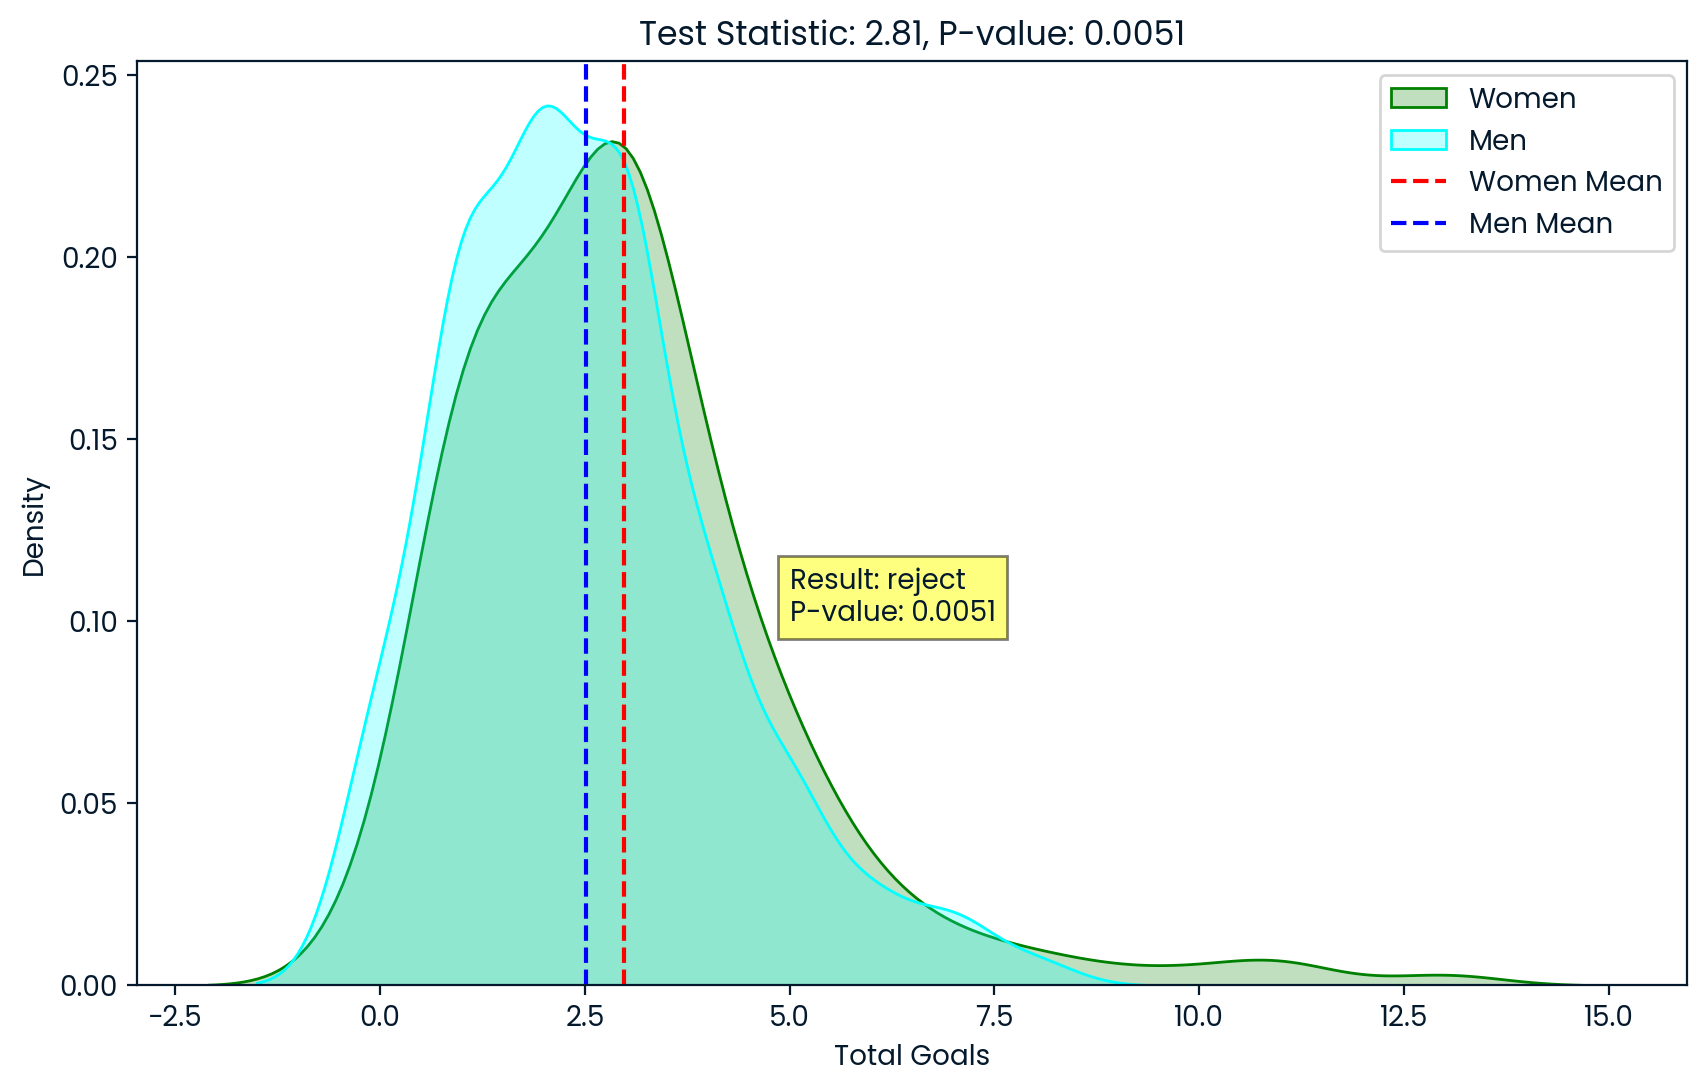

In [62]:
# KDE plot of the distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(women_world_cup['total_goals'], color='green', label='Women', shade=True)
sns.kdeplot(men_world_cup['total_goals'], color='cyan', label='Men', shade=True)
plt.axvline(x=women_world_cup['total_goals'].mean(), color='red', linestyle='--', label='Women Mean')
plt.axvline(x=men_world_cup['total_goals'].mean(), color='blue', linestyle='--', label='Men Mean')
plt.title(f'Test Statistic: {t_stat:.2f}, P-value: {p_val:.4f}')
plt.xlabel('Total Goals')
plt.ylabel('Density')
plt.legend()
plt.text(x=5, y=0.1, s=f'Result: {result_dict["result"]}\nP-value: {p_val:.4f}', bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()